In [1]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus




In [2]:
data = pd.read_csv('winequality_red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


quality is my label

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


from "count" i can say that i have all the values in the columns

In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
# separating the input feratures from the label
X = data.drop('quality', axis=1)
y = data['quality']

In [6]:
# splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=355)

In [7]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
693,9.0,0.480,0.32,2.8,0.084,21.0,122.0,0.99840,3.32,0.62,9.4
160,7.6,0.950,0.03,2.0,0.090,7.0,20.0,0.99590,3.20,0.56,9.6
612,7.5,0.640,0.00,2.4,0.077,18.0,29.0,0.99650,3.32,0.60,10.0
604,8.3,0.580,0.13,2.9,0.096,14.0,63.0,0.99840,3.17,0.62,9.1
376,11.5,0.450,0.50,3.0,0.078,19.0,47.0,1.00030,3.26,1.11,11.0
...,...,...,...,...,...,...,...,...,...,...,...
1255,6.1,0.640,0.02,2.4,0.069,26.0,46.0,0.99358,3.47,0.45,11.0
262,8.0,0.520,0.03,1.7,0.070,10.0,35.0,0.99575,3.34,0.57,10.0
704,9.1,0.765,0.04,1.6,0.078,4.0,14.0,0.99800,3.29,0.54,9.7
1146,7.8,0.500,0.12,1.8,0.178,6.0,21.0,0.99600,3.28,0.87,9.8


## without any preprocessing of the data, lets first visualize the data
clf = DecisionTreeClassifier(max_depth=4)

clf.fit(x_train,y_train)

In [26]:
s = set(y_train)
s

{3, 4, 5, 6, 7, 8}

In [27]:
# inserting the class label and the input features inside a list
class_name = list(y_train.unique())
feature_names = list(x_train.columns)
print(feature_names)
print(class_name)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
[7, 5, 3, 6, 4, 8]


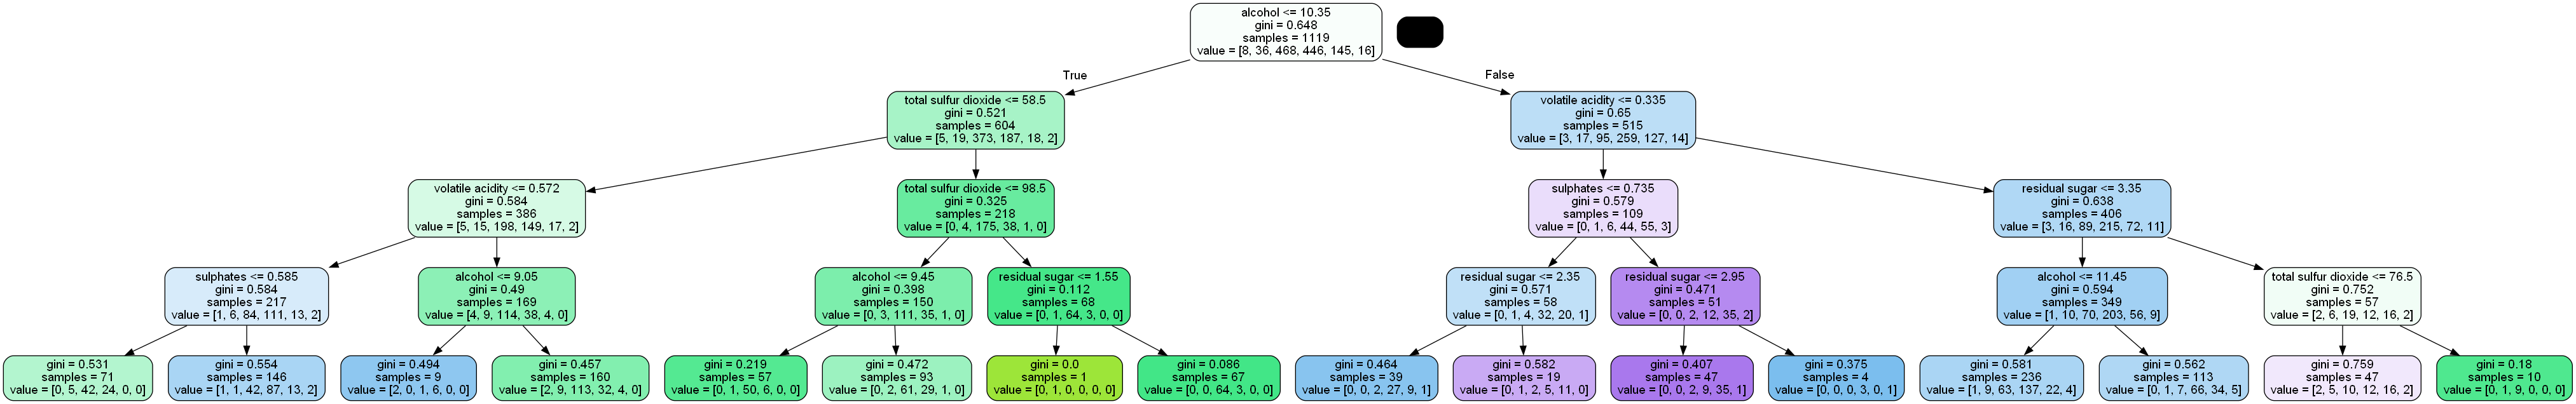

In [28]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_names,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [32]:
clf.score(x_train,y_train)

0.6505808757819481

In [34]:
py_pred = clf.predict(x_test)

In [35]:
clf.score(x_test, y_test)

0.5625

## hyperparameter tuning
i want to find the set and values of hyperparameters which will give the model a high accuracy

In [38]:
# scalling the data
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size=0.30, random_state=355)

In [41]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
# evaluating the score of the model
clf.score(x_test, y_test)

0.6416666666666667